# Dimensionality Reduction

In [33]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction
from sklearn.decomposition import PCA

# Set font scale and style
plt.rcParams.update({'font.size': 15})

# Pyspark models
from pyspark.sql import SparkSession
from pyspark import sql, SparkContext, SparkConf
import pyspark.sql.functions as F

In [22]:
# Import custom class
%run -i '../src/helper/transfxn.py'
%run -i '../src/helper/imputer.py'

In [23]:
# Create spark session
spark = SparkSession.builder.appName("project").getOrCreate()

# Load data 

In [24]:
df = spark.read.csv('../data/hmeq.csv', inferSchema = True, header = True)  # load data
df = df.toDF(*[c.lower() for c in df.columns]) # column names in lower case
print("Data size:", (df.count(), len(df.columns))) # print data size
df.show()

Data size: (5960, 13)
+---+----+--------+--------+-------+------+----+-----+------+------------+----+----+------------+
|bad|loan| mortdue|   value| reason|   job| yoj|derog|delinq|       clage|ninq|clno|     debtinc|
+---+----+--------+--------+-------+------+----+-----+------+------------+----+----+------------+
|  1|1100| 25860.0| 39025.0|HomeImp| Other|10.5|    0|     0|94.366666667|   1|   9|        null|
|  1|1300| 70053.0| 68400.0|HomeImp| Other| 7.0|    0|     2|121.83333333|   0|  14|        null|
|  1|1500| 13500.0| 16700.0|HomeImp| Other| 4.0|    0|     0|149.46666667|   1|  10|        null|
|  1|1500|    null|    null|   null|  null|null| null|  null|        null|null|null|        null|
|  0|1700| 97800.0|112000.0|HomeImp|Office| 3.0|    0|     0|93.333333333|   0|  14|        null|
|  1|1700| 30548.0| 40320.0|HomeImp| Other| 9.0|    0|     0|101.46600191|   1|   8|37.113613558|
|  1|1800| 48649.0| 57037.0|HomeImp| Other| 5.0|    3|     2|        77.1|   1|  17|        null

In [25]:
# Pandas dataframe
pdf = df.toPandas()

# Create feature matrix and class label

In [26]:
X,y = pdf.drop('bad', axis =1), pdf.bad

# Transformation pipeline

In [27]:
# Instantiate the  classes
transfxn = TransformationPipeline()
imputer = DataFrameImputer()

In [28]:
# Impute missing values
X_imputed = imputer.fit_transform(X)

In [29]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   loan     5960 non-null   int32  
 1   mortdue  5960 non-null   float64
 2   value    5960 non-null   float64
 3   reason   5960 non-null   object 
 4   job      5960 non-null   object 
 5   yoj      5960 non-null   float64
 6   derog    5960 non-null   float64
 7   delinq   5960 non-null   float64
 8   clage    5960 non-null   float64
 9   ninq     5960 non-null   float64
 10  clno     5960 non-null   float64
 11  debtinc  5960 non-null   float64
dtypes: float64(9), int32(1), object(2)
memory usage: 535.6+ KB


In [30]:
# Transform and scale data
X_scaled, _, _ = transfxn.preprocessing(X_imputed, X_imputed)

In [31]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (5960, 18)


# PCA plot

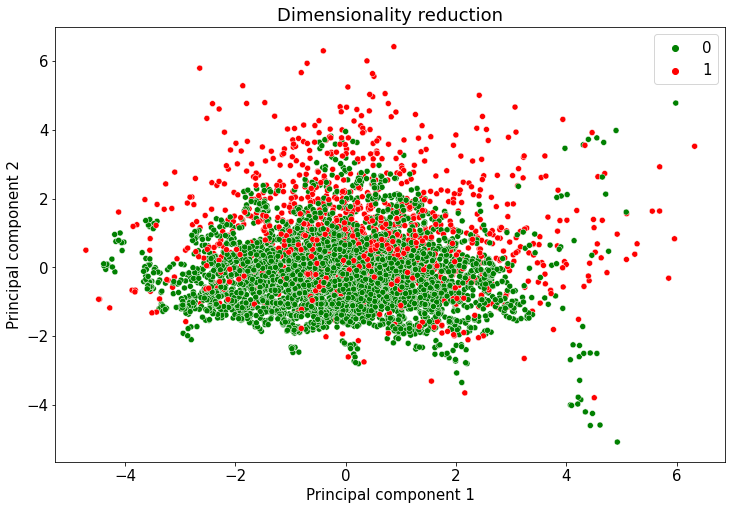

In [32]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])